In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.utils as utils
import mlgrad.pca as pca

from sklearn.preprocessing import robust_scale, scale
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine


In [3]:
df = pd.read_csv("data/CigarettesSW.csv", index_col='id')
df

,state,year,cpi,population,packs,income,tax,price,taxs
id,,,,,,,,,
1,AL,1985,1.076,3973000.0,116.486282,46014968,32.500004,102.181671,33.348335
2,AR,1985,1.076,2327000.0,128.534592,26210736,37.000000,101.474998,37.000000
3,AZ,1985,1.076,3184000.0,104.522614,43956936,31.000000,108.578751,36.170418
4,CA,1985,1.076,26444000.0,100.363037,447102816,26.000000,107.837341,32.104000
5,CO,1985,1.076,3209000.0,112.963539,49466672,31.000000,94.266663,31.000000
...,...,...,...,...,...,...,...,...,...
92,VT,1995,1.524,582827.0,122.334755,12448607,44.000000,175.638748,52.363750
93,WA,1995,1.524,5431024.0,65.530922,129680832,80.500000,239.109344,96.142670
94,WI,1995,1.524,5137004.0,92.466347,115959680,62.000000,201.381256,71.589584


In [4]:
X0 = df.values[:,2:]
X0 = X0.astype('d')
X0 = scale(X0)
N = len(X0)
n = X0.shape[1]
print(X0.shape)

(96, 7)


/usr/lib/python3/dist-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [5]:
pca_sk = PCA()
U0 = pca_sk.fit_transform(X0)

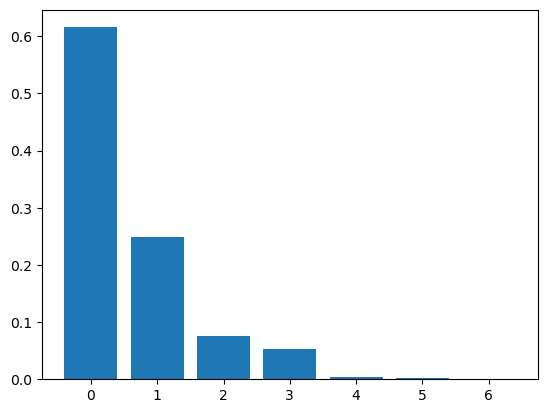

In [6]:
plt.bar(range(n), pca_sk.explained_variance_ratio_)
plt.show()

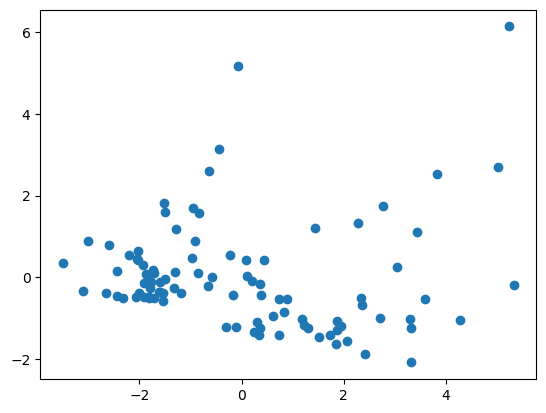

In [7]:
plt.scatter(U0[:,0], U0[:,1])
plt.show()

In [8]:
alpha = 0.55
print(alpha)

0.55


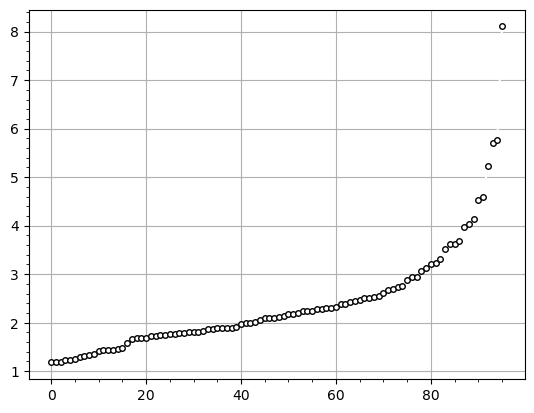

[ 5.551e-17  1.850e-17 -2.776e-17 -7.401e-17  3.701e-17 -6.939e-18
  1.388e-17]


In [9]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c0), bins=40, rwidth=0.9)
plt.grid(1)
plt.minorticks_on()
plt.show()
print(c0)

[ 0.104 -0.462  0.269 -0.471 -0.527 -0.215 -0.634]


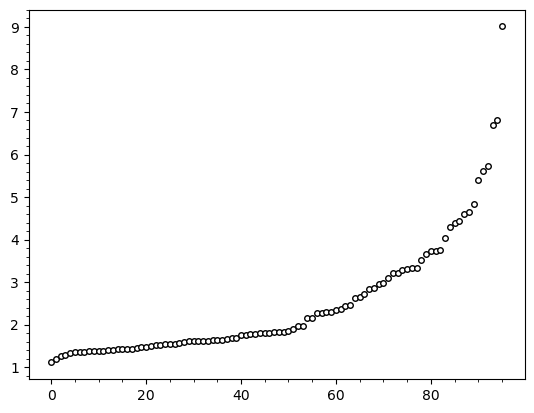

In [10]:
# alpha = (N - 15) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c), bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

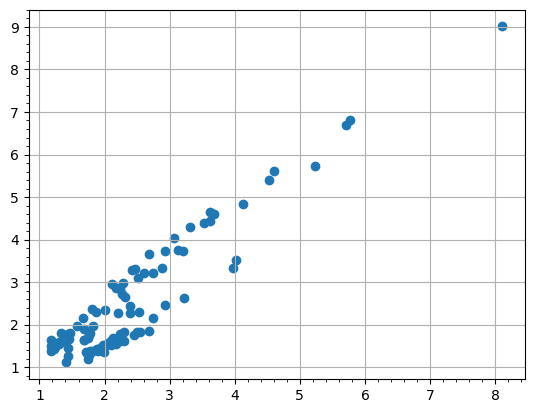

In [11]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [12]:
X1_0 = X0 - c0
X1 = X0 - c

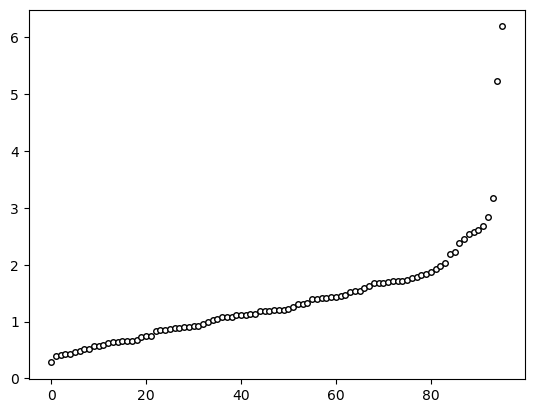

4.308718471483977 [ 0.392  0.170 -0.364  0.254  0.447  0.462  0.455]


In [13]:
a1_0, L1_0 = pca.find_pc(X1_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1_0, a1_0), bins=30, rwidth=0.9)
plt.show()
print(L1_0, a1_0)

2.888891694931644 [ 0.525  0.085 -0.171  0.124  0.418  0.541  0.452]


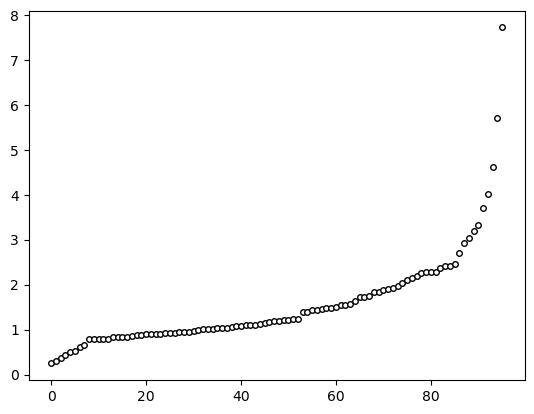

In [14]:
# alpha = (N - 15) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1, a1), bins=30, rwidth=0.9)
plt.show()
U1 = pca.project_line(X1_0, a1)
U1_0 = pca.project_line(X1, a1_0)

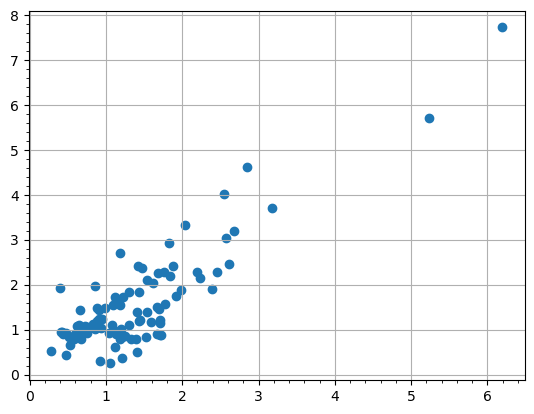

In [15]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [16]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

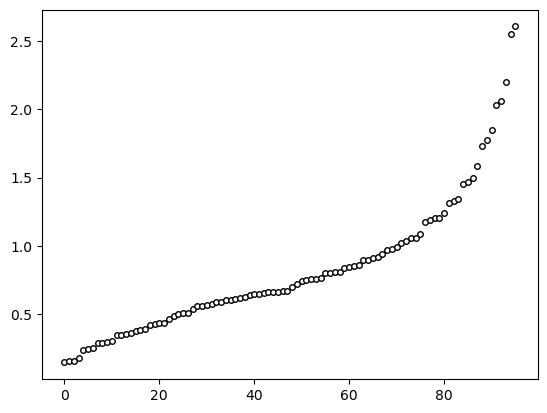

1.7439216538179845 [-0.211  0.703  0.026  0.634 -0.131 -0.164 -0.119]


In [17]:
a2_0, L2_0 = pca.find_pc(X2_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
plt.show()
print(L2_0, a2_0)

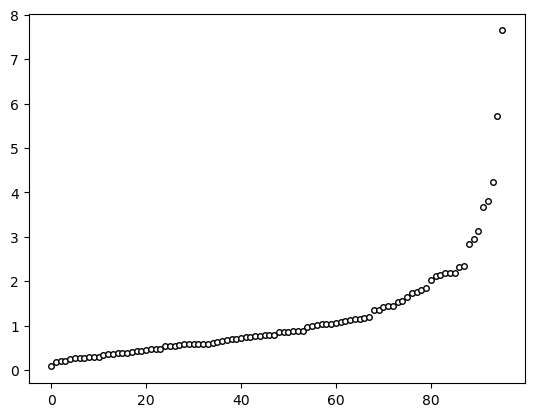

0.8618591330322295 [ 0.646  0.082  0.453  0.023 -0.359  0.163 -0.464]


In [19]:
# alpha = (N - 20) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
a2, L2 = pca.find_robust_pc(X2, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

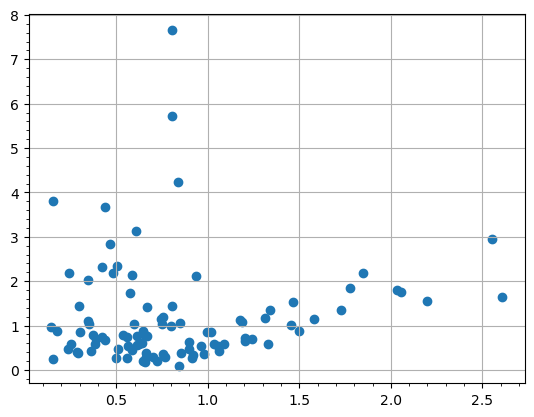

In [20]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [21]:
X3_0 = pca.project(X2_0, a2_0)
X3 = pca.project(X2, a2)

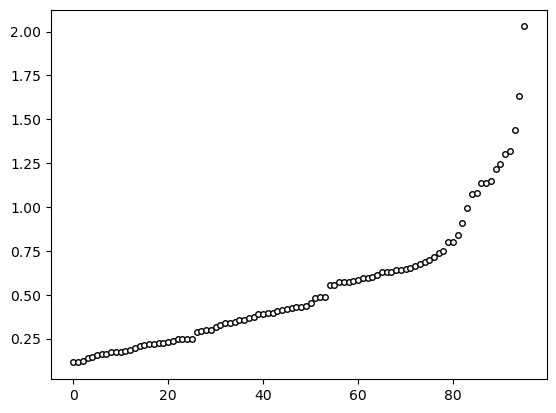

0.5242803797693901 [ 0.478  0.061  0.844  0.105 -0.019  0.209 -0.012]


In [22]:
a3_0, L3_0 = pca.find_pc(X3_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X3_0, a3_0), bins=30, rwidth=0.9)
plt.show()
print(L3_0, a3_0)

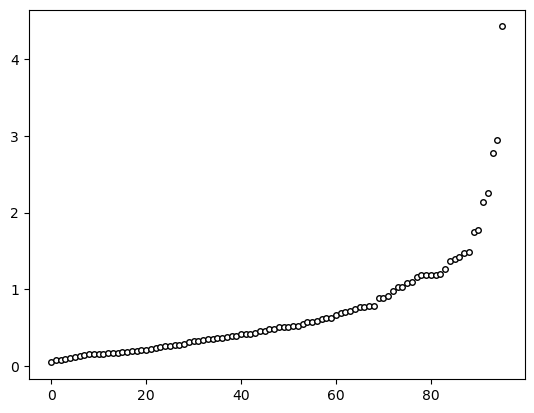

0.35023632517368675 [ 0.245 -0.676 -0.353 -0.558  0.074  0.002 -0.207]


In [24]:
# alpha = (N - 20) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
a3, L3 = pca.find_robust_pc(X3, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X3, a3), bins=30, rwidth=0.9)
plt.show()
print(L3, a3)
U3 = pca.project_line(X3, a3)
U3_0 = pca.project_line(X3_0, a3_0)

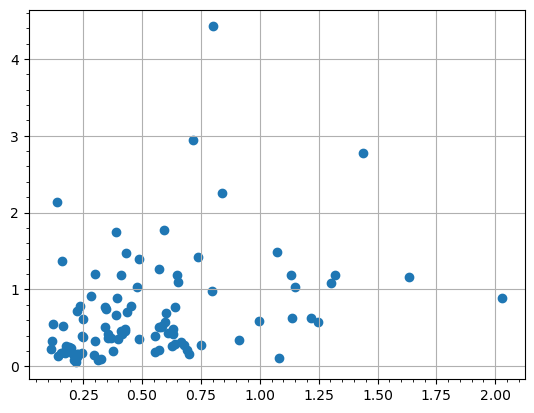

In [25]:
plt.scatter(pca.distance_line(X3_0, a3_0), pca.distance_line(X3, a3))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [26]:
from sklearn.decomposition import PCA

In [27]:
def positive(U):
    if max(U[U>0]) < max(abs(U[U<0])):
        U = -U
    return U

U1 = positive(U1)
U2 = positive(U2)
U3 = positive(U3)
U1_0 = positive(U1_0)
U2_0 = positive(U2_0)
U3_0 = positive(U3_0)


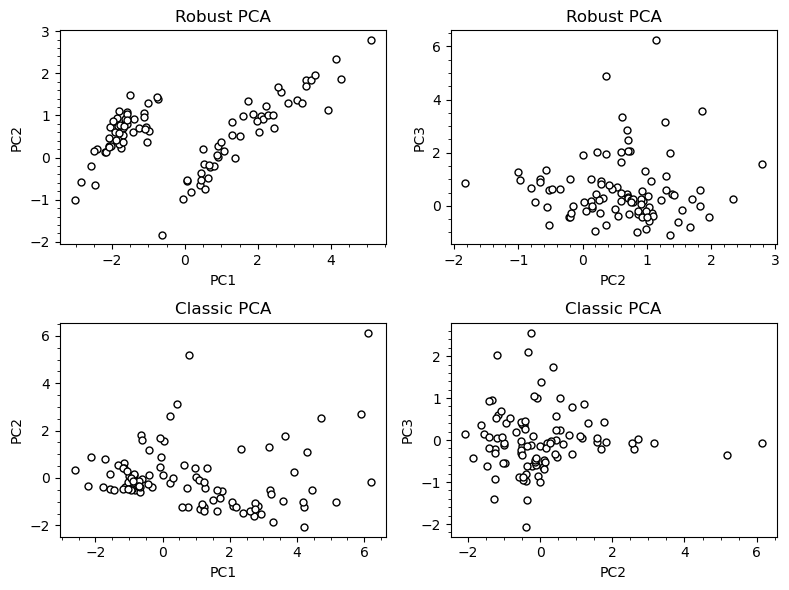

In [28]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,2)
plt.title('Robust PCA')
plt.scatter(U2, U3, s=25, c='w', edgecolors='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,3)
plt.title('Classic PCA')
plt.scatter(U1_0, U2_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,4)
plt.title('Classic PCA')
plt.scatter(U2_0, U3_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.savefig('fig/robust_pca_cigarette.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


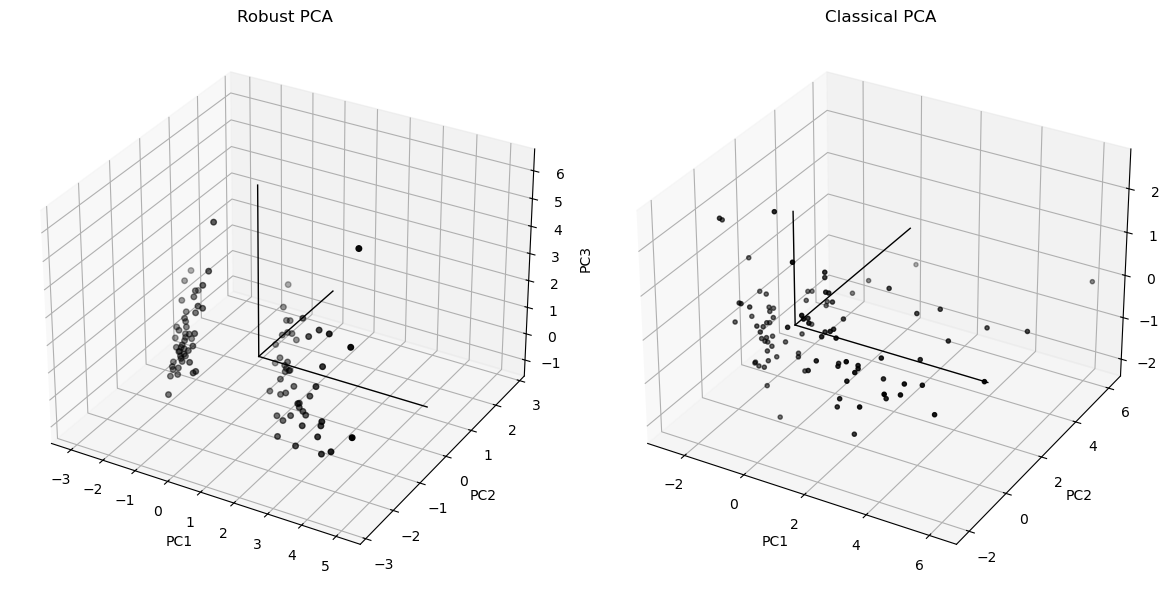

In [29]:
fig, axes = plt.subplots(1, 2, 
                         subplot_kw={"projection": "3d"}, )
fig.set_size_inches(14, 6)
ax1, ax2 = axes
ax1.scatter(U1, -U2, U3, s=16, c='k')

ax1.plot([0, U1.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, U2.max()], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, 0], [0, U3.max()], color='k', linewidth=1.0)

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3', rotation='vertical')

# ax1.set_xlim(U1.min(), U1.max())
# ax1.set_ylim(U2.min(), U2.max())
# ax1.set_zlim(U3.min(), U3.max())

ax1.set_title('Robust PCA')

ax2.scatter(U1_0, U2_0, U3_0, s=9, c='k')

ax2.plot([0, U1_0.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, U2_0.max()], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, 0], [0, U3_0.max()], color='k', linewidth=1.0)

# ax2.set_xlim(U1_0.min(), U1_0.max())
# ax2.set_ylim(U2_0.min(), U2_0.max())
# ax2.set_zlim(U3_0.min(), U3_0.max())

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3', rotation='vertical')

ax2.set_title('Classical PCA')

fig.set_tight_layout(True)

plt.savefig('fig/robust_pca_cigarette_1.eps')

plt.show()

In [30]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X1_0)

In [32]:
# N = len(X1)
# alpha = (N - 25) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(alpha, 0.001))
As, Ls, Us = pca.find_robust_pc_all(X1, wma)

0.55


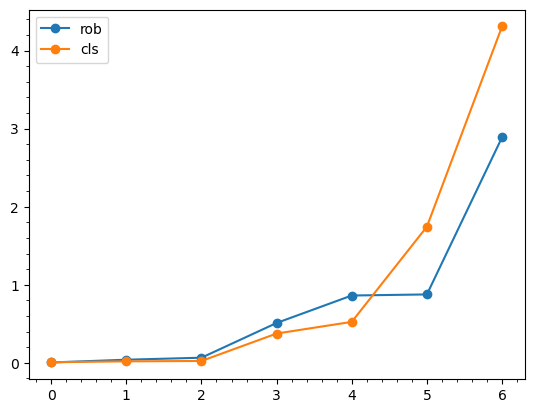

In [33]:
plt.plot(sorted(Ls), marker='o', label='rob')
plt.plot(sorted(Ls_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [34]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

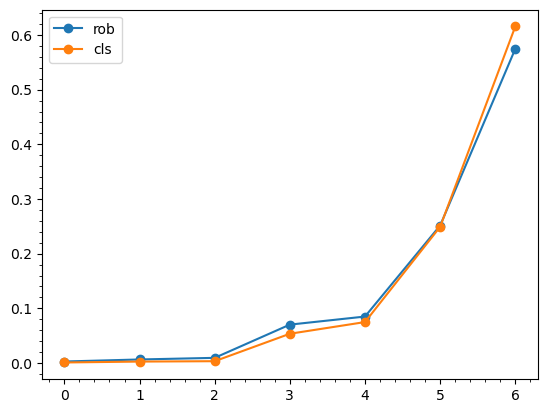

In [35]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [36]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [37]:
S = robust_scatter_matrix(X1, wma)
# print(S)

[[  3.825   1.907  -0.072  -2.751   2.237  -6.179   0.705]
 [  1.907  11.776  -0.976 -13.659   1.496  -1.600  -0.669]
 [ -0.072  -0.976   0.559   1.183  -0.198   0.117   0.393]
 [ -2.751 -13.659   1.183  16.816  -1.641   2.724   0.242]
 [  2.237   1.496  -0.198  -1.641   2.707  -3.451  -1.109]
 [ -6.179  -1.600   0.117   2.724  -3.451  10.522  -1.591]
 [  0.705  -0.669   0.393   0.242  -1.109  -1.591   2.309]] 0.8566825511049821
[[  4.322   3.262  -0.544  -3.967   0.589  -6.375   1.727]
 [  3.262  17.024  -0.697 -21.727   4.941  -3.818  -2.526]
 [ -0.544  -0.697   0.395   0.962  -0.393   0.943   0.129]
 [ -3.967 -21.727   0.962  28.957  -6.116   4.414   3.303]
 [  0.589   4.941  -0.393  -6.116   3.918  -0.524  -3.508]
 [ -6.375  -3.818   0.943   4.414  -0.524   9.708  -2.935]
 [  1.727  -2.526   0.129   3.303  -3.508  -2.935   4.634]] 0.8521678773842605
[[  4.761   1.384  -0.386  -1.792   0.937  -7.444   1.907]
 [  1.384  13.240  -1.493 -15.583   4.468  -0.909  -4.105]
 [ -0.386  -1.49

In [38]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[6.102e-01 3.016e-01 7.177e-02 9.682e-03 2.978e-04 3.683e-03 2.692e-03]
